In [1]:
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt
from read_experiments import average_runs, load_exp_df

from bart_behavior_analysis import plot_bart_behaviors

pplt.rc.update({'font.size': 10})

# Basic learning curves

Note that balloon colors have expected popping sizes of 0.2, 0.5, 0.8 for red, yellow, orange. 

The 1 color trials only use yellow, so have expected value of 0.5

The 3 color trials also end up with the same expected value

Realistically since the inflation steps are discrete and with a speed of 0.05, the optimal inflations are going to be slightly lower

## Color, batch, processes

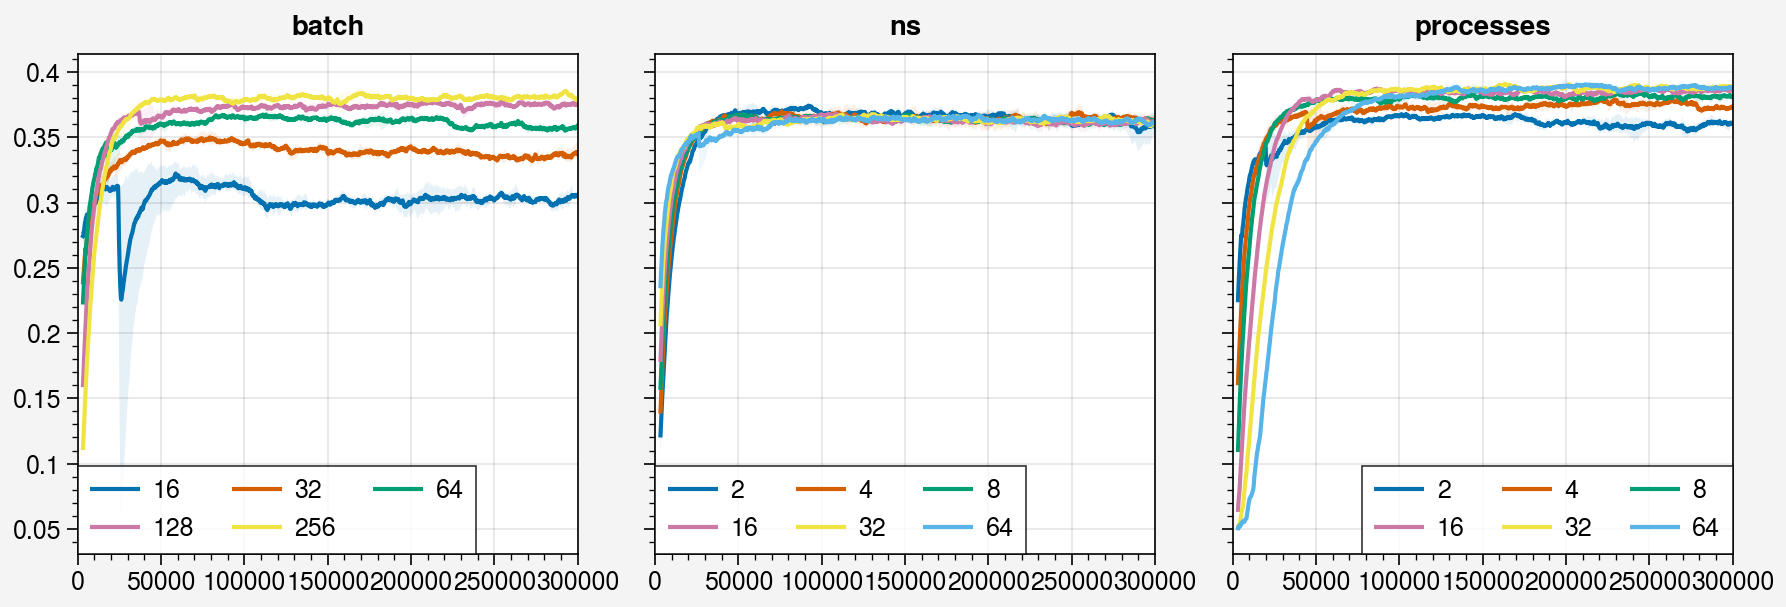

In [8]:
experiments = {
    'batch': {'key': 'bs{batch}', 'vals': [16, 32, 64, 128, 256]},
    'ns': {'key': 'ns{ns}', 'vals': [2, 4, 8, 16, 32, 64]},
    'processes': {'key': 'nump{processes}', 'vals': [2, 4, 8, 16, 32, 64]},
}

color = 1
title = []
fig, ax = pplt.subplots(ncols=3)
for i, exp in enumerate(experiments):
    for j, val in enumerate(experiments[exp]['vals']):
        formatter = {exp: val}
        exp_substr = experiments[exp]['key'].format(**formatter)
        exp_name = f'basics/{color}color_mlp_{exp_substr}'
        average_runs(exp_name, ewm=0.001, ax=ax[i], label=f'{val}')
        title.append(str(val))
    ax[i].legend()
ax.format(toplabels=experiments.keys(), xlim=[0, 300_000])



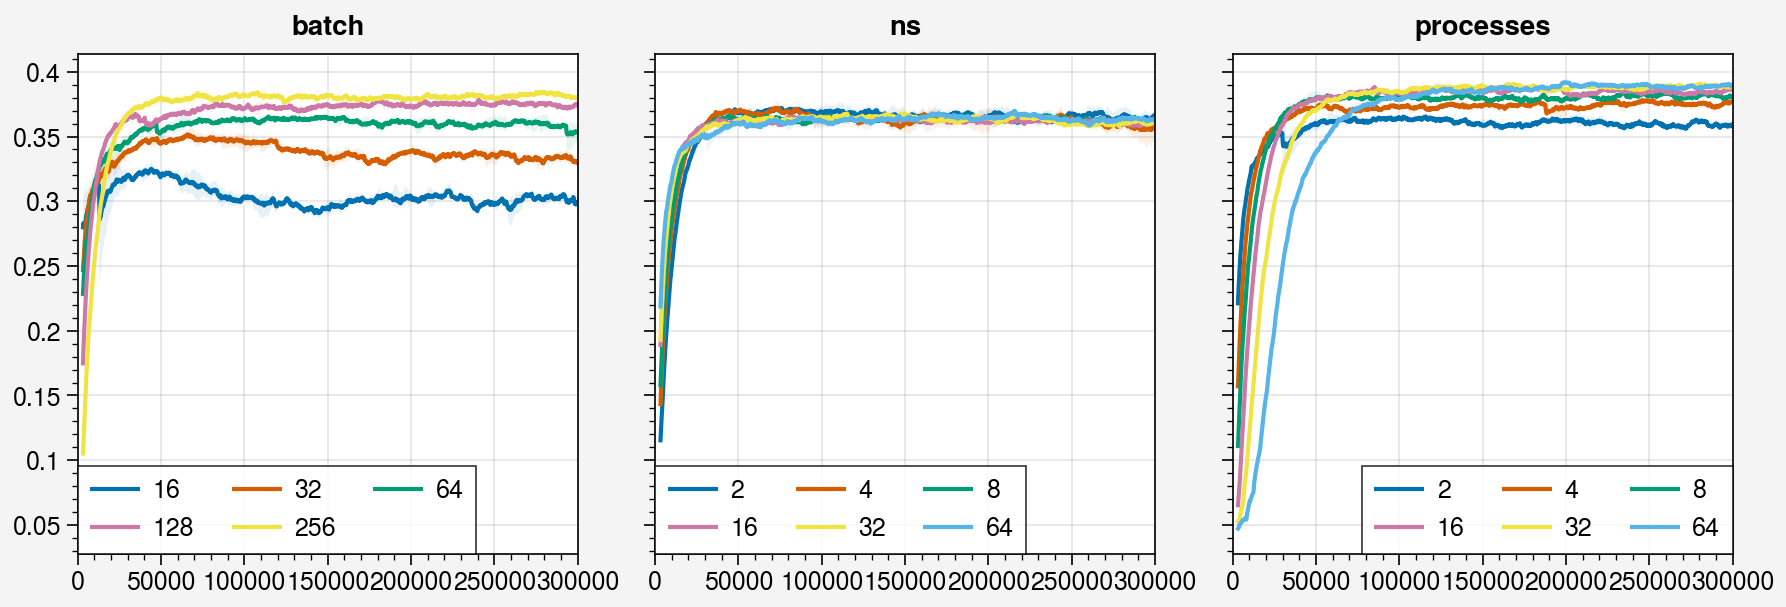

In [9]:
experiments = {
    'batch': {'key': 'bs{batch}', 'vals': [16, 32, 64, 128, 256]},
    'ns': {'key': 'ns{ns}', 'vals': [2, 4, 8, 16, 32, 64]},
    'processes': {'key': 'nump{processes}', 'vals': [2, 4, 8, 16, 32, 64]},
}

color = 3
title = []
fig, ax = pplt.subplots(ncols=3)
for i, exp in enumerate(experiments):
    for j, val in enumerate(experiments[exp]['vals']):
        formatter = {exp: val}
        exp_substr = experiments[exp]['key'].format(**formatter)
        exp_name = f'basics/{color}color_mlp_{exp_substr}'
        average_runs(exp_name, ewm=0.001, ax=ax[i], label=f'{val}')
        title.append(str(val))
    ax[i].legend()
ax.format(toplabels=experiments.keys(), xlim=[0, 300_000])

### More num processes

In [1]:
experiments = {
    'processes': {'key': 'nump{processes}', 'vals': [64, 128, 256, 512]},
}

color = 3
title = []
fig, ax = pplt.subplots()
for i, exp in enumerate(experiments):
    for j, val in enumerate(experiments[exp]['vals']):
        formatter = {exp: val}
        exp_substr = experiments[exp]['key'].format(**formatter)
        exp_name = f'basics/{color}color_mlp_{exp_substr}'
        average_runs(exp_name, ewm=0.001, ax=ax, label=f'{val}')
        title.append(str(val))
    ax[i].legend()
ax.format(toplabels=experiments.keys(), xlim=[0, 300_000], ylabel='Return')

NameError: name 'pplt' is not defined

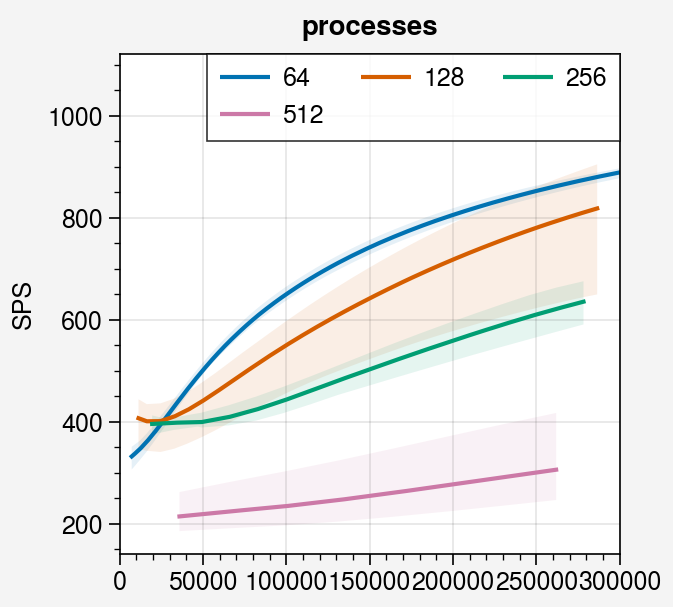

In [16]:
experiments = {
    'processes': {'key': 'nump{processes}', 'vals': [64, 128, 256, 512]},
}

color = 3
title = []
fig, ax = pplt.subplots()
for i, exp in enumerate(experiments):
    for j, val in enumerate(experiments[exp]['vals']):
        formatter = {exp: val}
        exp_substr = experiments[exp]['key'].format(**formatter)
        exp_name = f'basics/{color}color_mlp_{exp_substr}'
        average_runs(exp_name, 'charts/SPS', ewm=0.001, ax=ax, label=f'{val}')
        title.append(str(val))
    ax[i].legend()
ax.format(toplabels=experiments.keys(), xlim=[0, 300_000], ylabel='SPS')

### Num mini batch

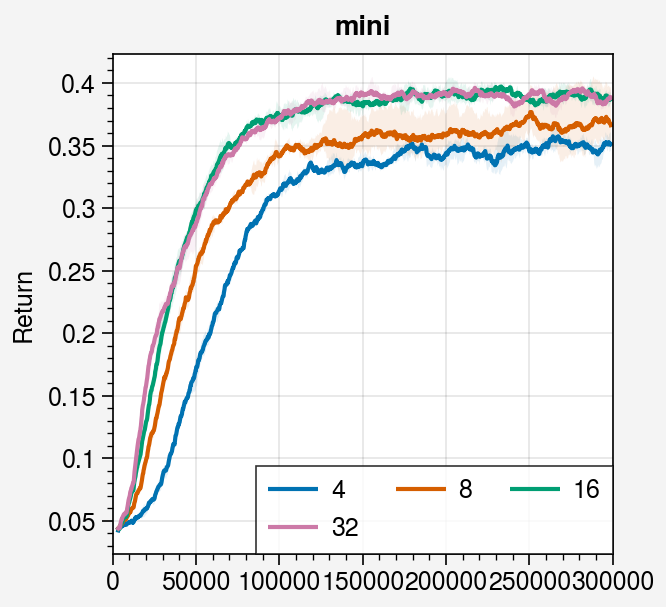

In [18]:
experiments = {
    'mini': {'key': 'minib{mini}', 'vals': [4, 8, 16, 32]},
}

color = 3
title = []
fig, ax = pplt.subplots()
for i, exp in enumerate(experiments):
    for j, val in enumerate(experiments[exp]['vals']):
        formatter = {exp: val}
        exp_substr = experiments[exp]['key'].format(**formatter)
        exp_name = f'basics/{color}color_mlp_{exp_substr}'
        average_runs(exp_name, ewm=0.001, ax=ax, label=f'{val}')
        title.append(str(val))
    ax[i].legend()
ax.format(toplabels=experiments.keys(), xlim=[0, 300_000], ylabel='Return')

### SPS

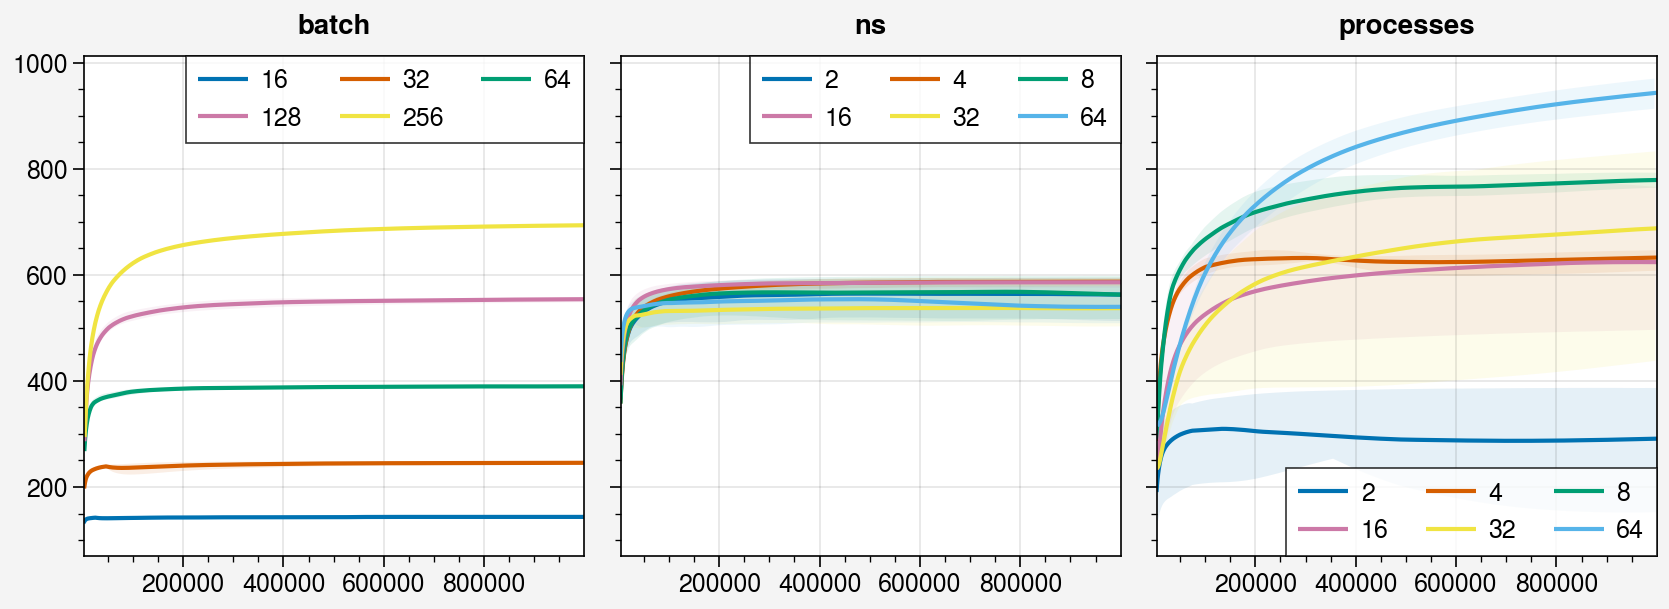

In [ ]:
experiments = {
    'batch': {'key': 'bs{batch}', 'vals': [16, 32, 64, 128, 256]},
    'ns': {'key': 'ns{ns}', 'vals': [2, 4, 8, 16, 32, 64]},
    'processes': {'key': 'nump{processes}', 'vals': [2, 4, 8, 16, 32, 64]},
}

color = 1
title = []
fig, ax = pplt.subplots(ncols=3, sharey=True)
for i, exp in enumerate(experiments):
    for j, val in enumerate(experiments[exp]['vals']):
        formatter = {exp: val}
        exp_substr = experiments[exp]['key'].format(**formatter)
        exp_name = f'basics/{color}color_mlp_{exp_substr}'
        average_runs(exp_name, metric='charts/SPS', ewm=0.001, ax=ax[i], label=f'{val}')
        title.append(str(val))
    ax[i].legend()
ax.format(toplabels=experiments.keys())

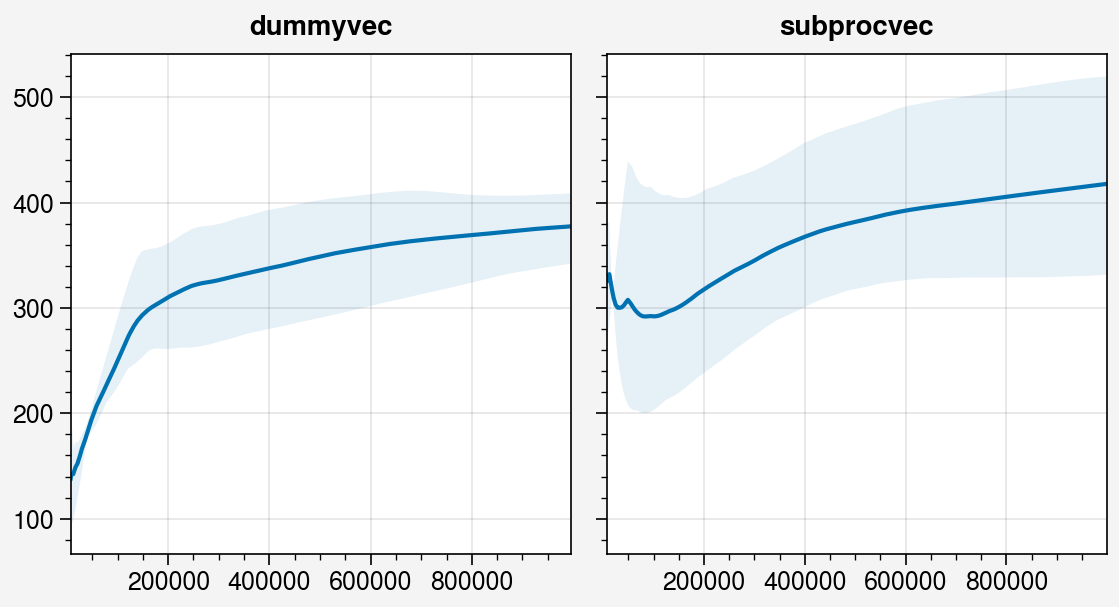

In [ ]:
vec_types = ['dummyvec', 'subprocvec']
fig, ax = pplt.subplots(ncols=2)
for i, vec in enumerate(vec_types):
    exp_name = f'rnn/rnn_{vec}'
    average_runs(exp_name, metric='charts/SPS', ewm=0.001, ax=ax[i])
ax.format(toplabels=vec_types)

## RNN

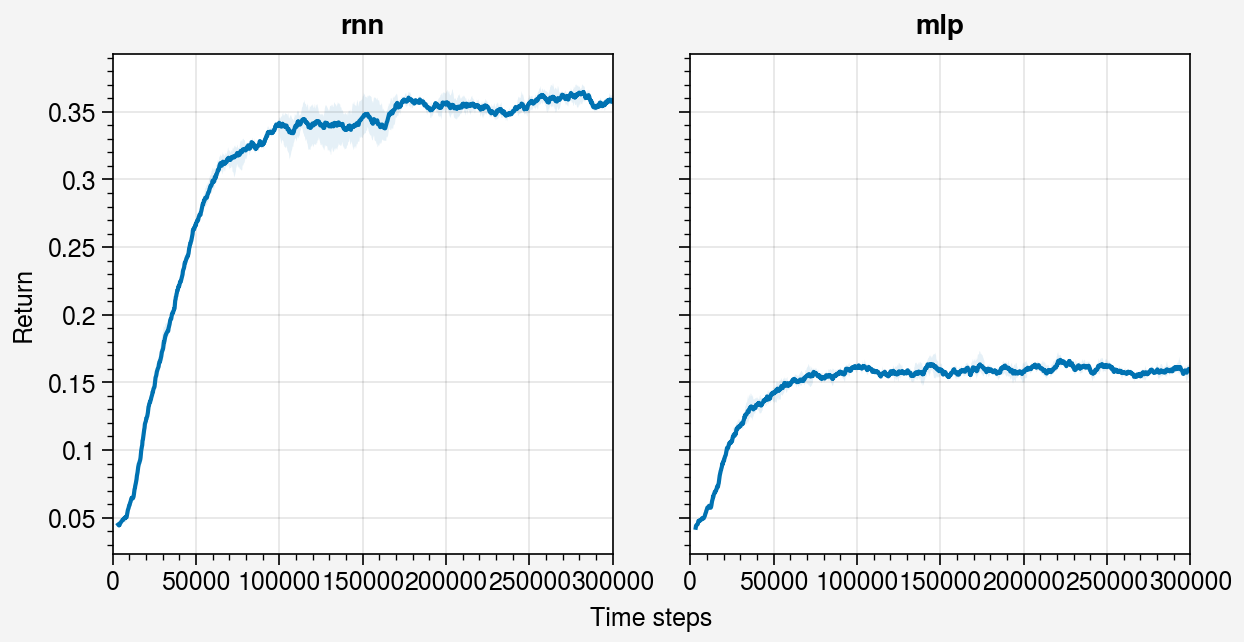

In [ ]:
network_types = ['rnn', 'mlp']
fig, ax = pplt.subplots(ncols=2)
for i, net_type in enumerate(network_types):
    exp_name = f'rnn/memory_{net_type}'
    average_runs(exp_name, ewm=0.001, ax=ax[i], label=net_type)
ax.format(toplabels=network_types, xlabel='Time steps', ylabel='Return', xlim=[0, 300000])

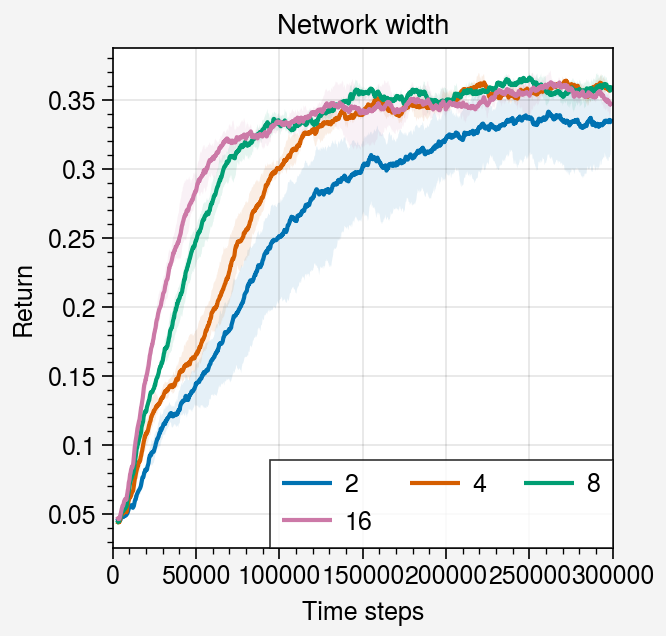

In [28]:
network_sizes = [2, 4, 8, 16]
fig, ax = pplt.subplots()
for i, ns in enumerate(network_sizes):
    exp_name = f'rnn/memory_ns{ns}'
    average_runs(exp_name, ewm=0.001, ax=ax, label=f'{ns}')
ax.legend()
ax.format(xlim=[0, 300_000], title='Network width', ylabel='Return',
          xlabel='Time steps')

## Toggle

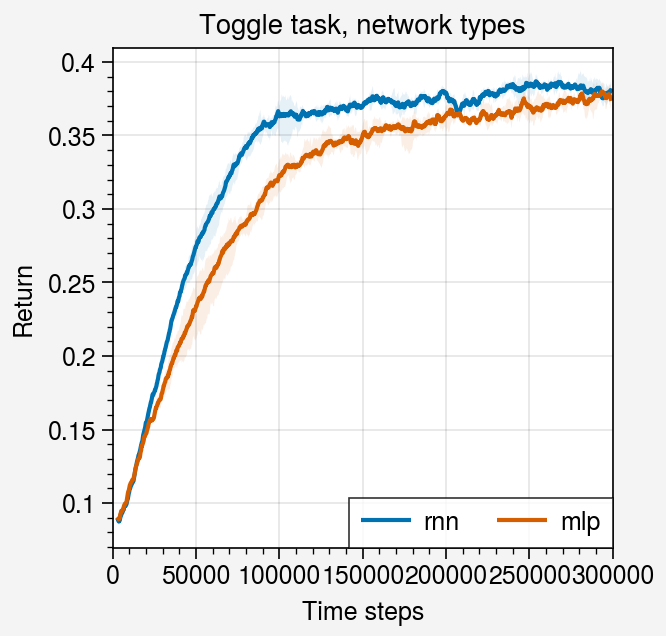

In [30]:
network_types = ['rnn', 'mlp']
fig, ax = pplt.subplots()
for i, net_type in enumerate(network_types):
    exp_name = f'toggle/toggle_{net_type}'
    average_runs(exp_name, ewm=0.001, label=net_type, ax=ax)
ax.legend()
ax.format(title='Toggle task, network types',
          xlabel='Time steps', ylabel='Return', xlim=[0, 300000])

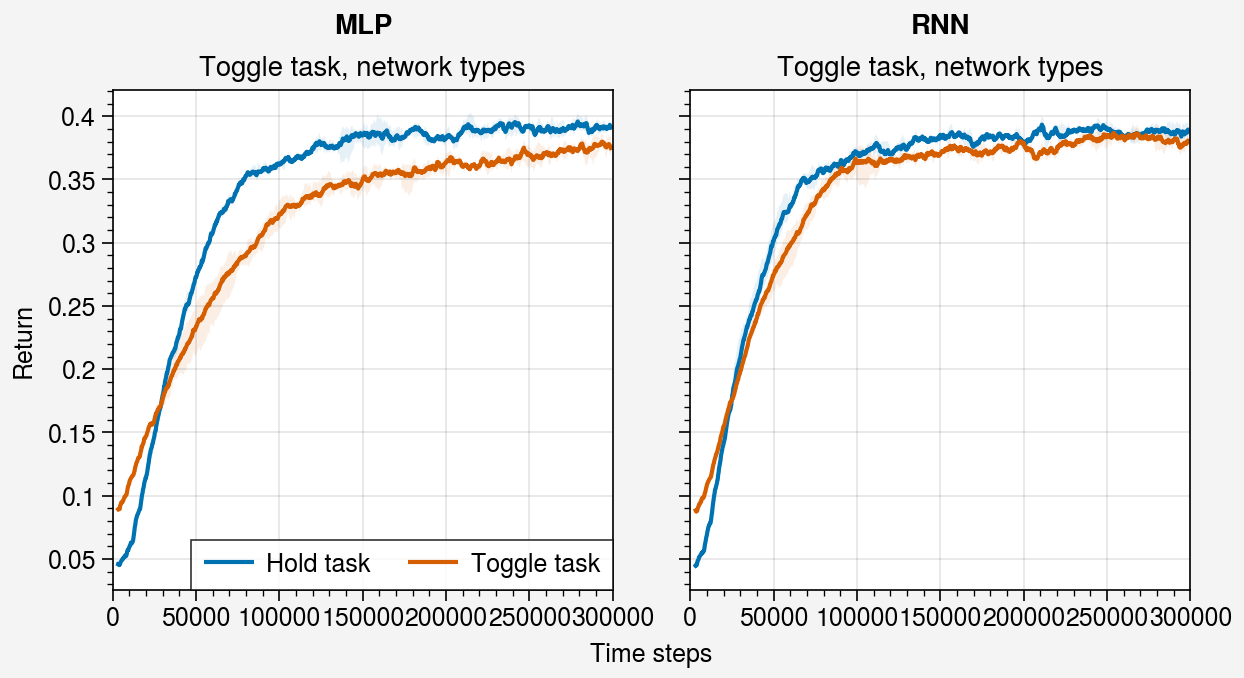

In [6]:
exp_types = ['3color', 'toggle']
net_types = ['mlp', 'rnn']
labels = ['Hold task', 'Toggle task']
fig, ax = pplt.subplots(ncols=2)
for i, net_type in enumerate(net_types):
    for j, exp_type in enumerate(exp_types):
        exp_name = f'toggle/{exp_type}_{net_type}'
        average_runs(exp_name, ewm=0.001, label=labels[j], ax=ax[i])
ax[0].legend()
ax.format(title='Toggle task, network types',
          toplabels=['MLP', 'RNN'],
          xlabel='Time steps', ylabel='Return', xlim=[0, 300000])

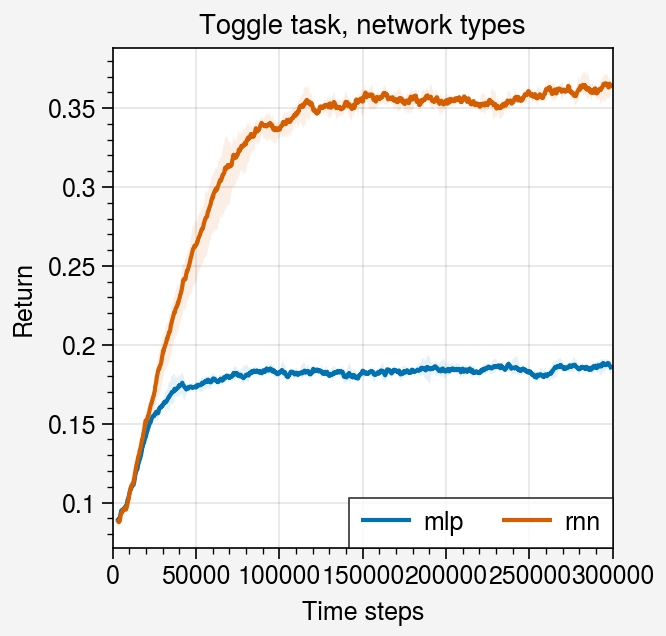

In [8]:
net_types = ['mlp', 'rnn']
fig, ax = pplt.subplots()
for i, net_type in enumerate(net_types):
    exp_name = f'toggle/togglemem_{net_type}'
    average_runs(exp_name, ewm=0.001, label=net_types[i], ax=ax)
ax.legend()
ax.format(title='Toggle task, network types',
          xlabel='Time steps', ylabel='Return', xlim=[0, 300000])

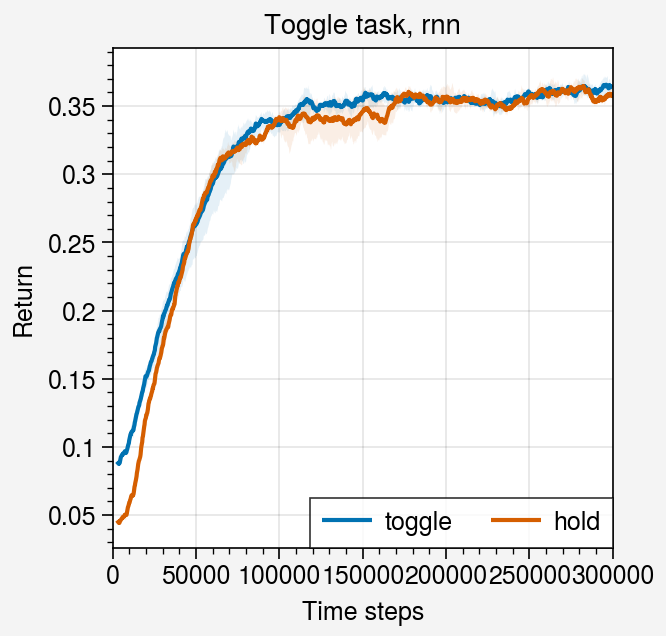

In [15]:
task_types = ['toggle', 'hold']
exp_names = ['toggle/togglemem_rnn', 'rnn/memory_rnn']
fig, ax = pplt.subplots()
for i, exp_name in enumerate(exp_names):
    average_runs(exp_name, ewm=0.001, label=task_types[i], ax=ax)
ax.legend()
ax.format(title='Toggle task, rnn',
          xlabel='Time steps', ylabel='Return', xlim=[0, 300000])

# Behavioral Curves

In [69]:

color_to_idx = {"red": 0, "yellow": 1, "orange": 2,
                        "gray": 4, "purple": 4}
idx_to_color = {0: "red", 1: "yellow", 2: "orange",
                            3: "gray", 4: "purple"}
bart_plot_colors = ['deep red', 'orange', 'goldenrod']

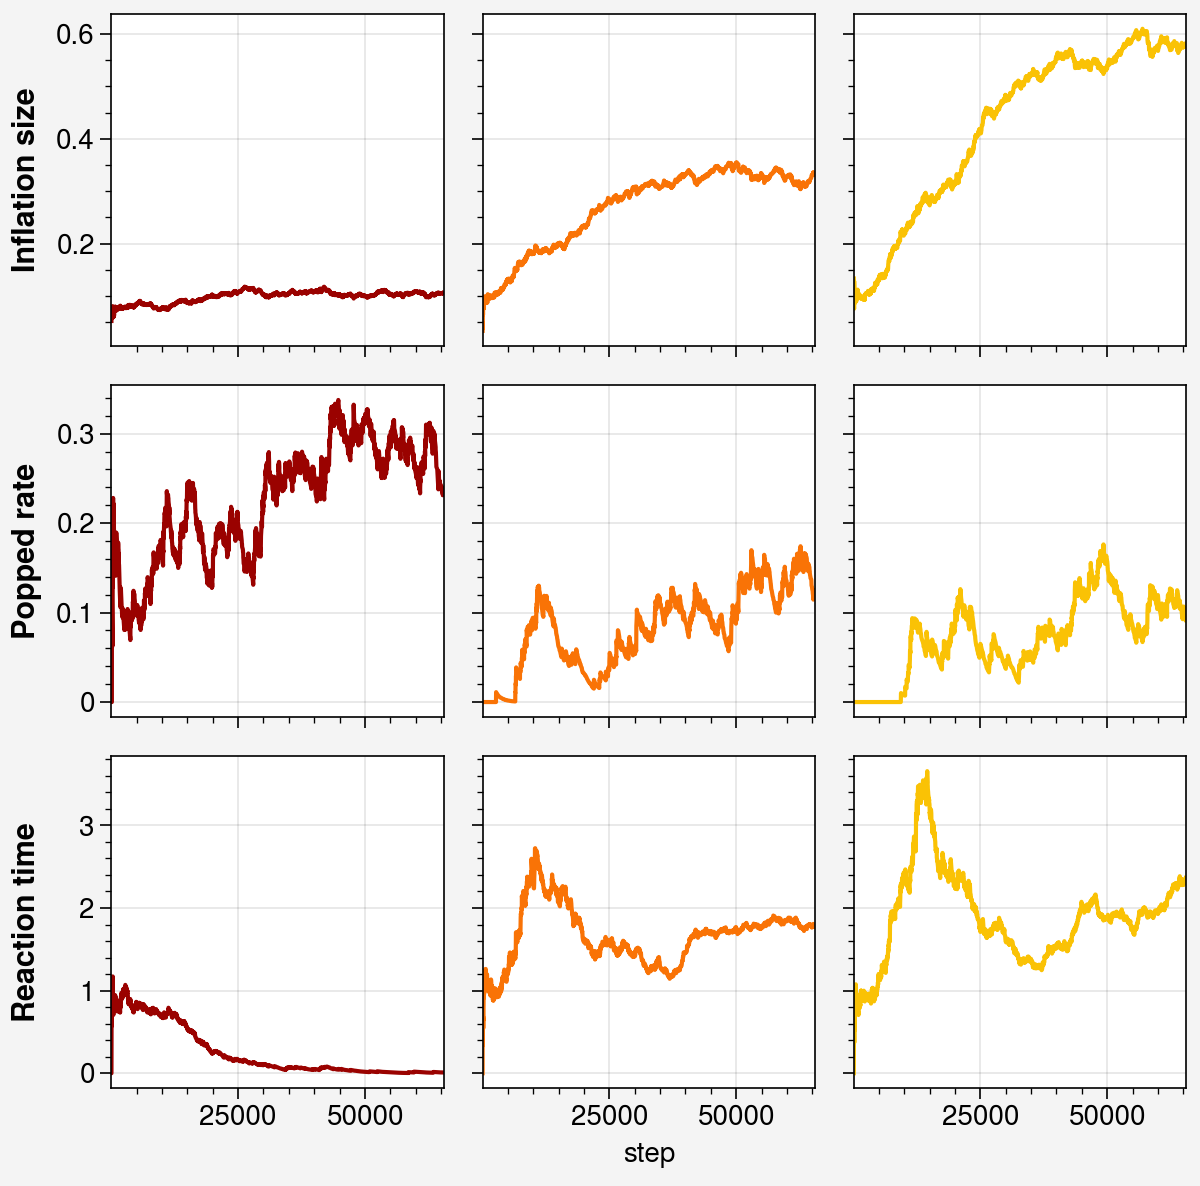

In [98]:

df = load_exp_df('basics/behav', trial_num=0)
plot_bart_behaviors(df, metrics=['size', 'popped', 'rt'])


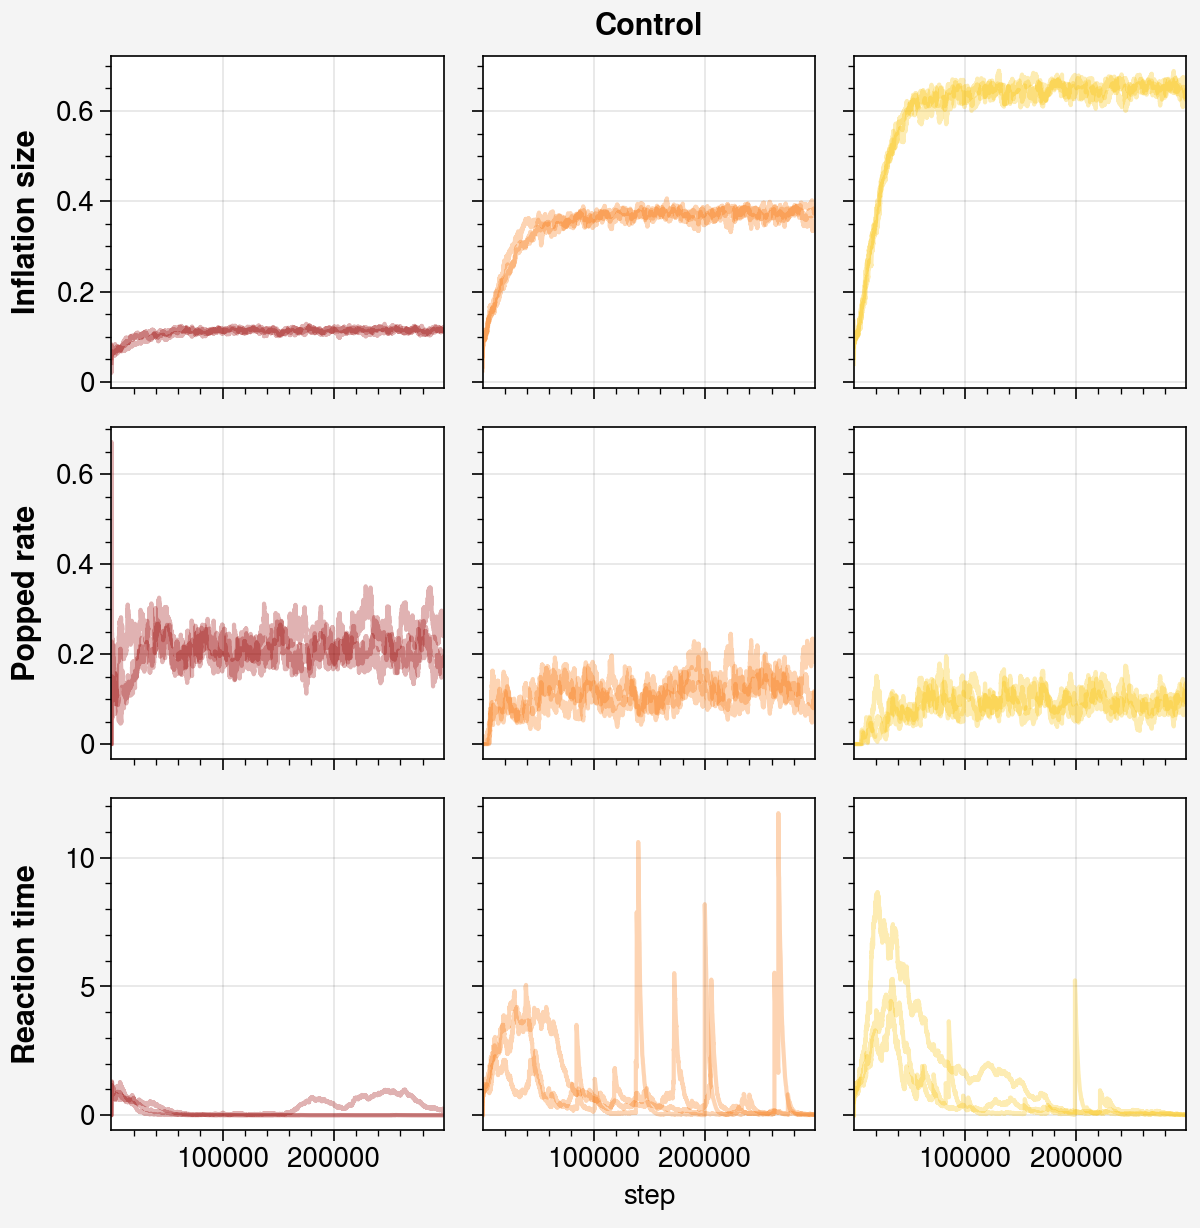

In [7]:
ax = None
for i in range(3):
    df = load_exp_df('behav/behav', trial_num=i)
    ax = plot_bart_behaviors(df, metrics=['size', 'popped', 'rt'], ax=ax,
                             alpha=0.3)
ax.format(suptitle='Control')


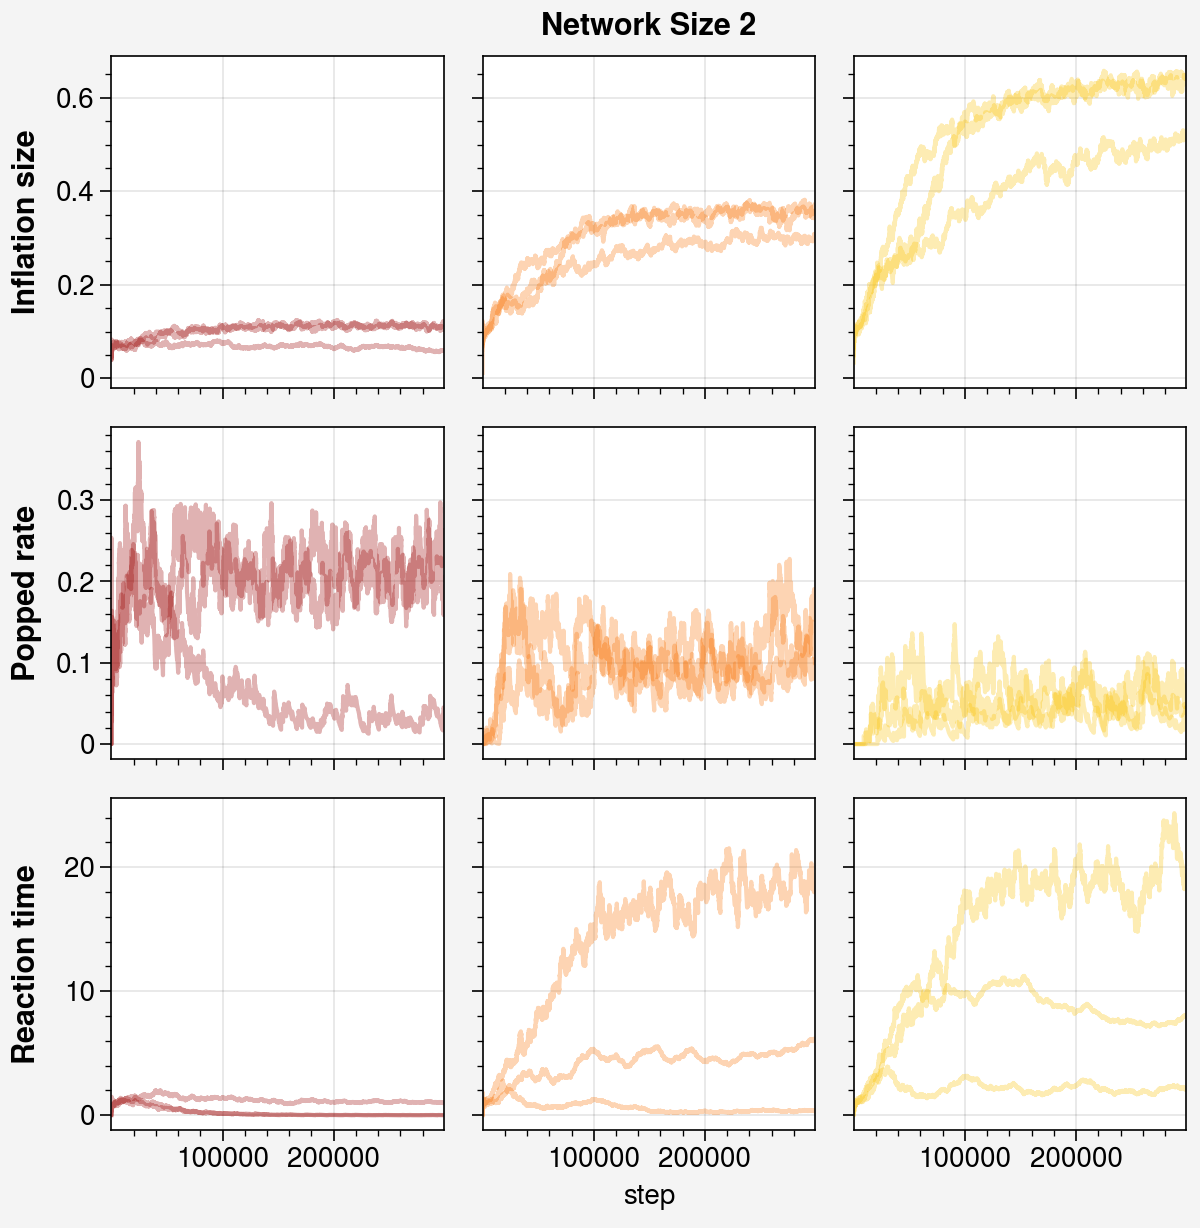

In [8]:
ax = None
for i in range(3):
    df = load_exp_df('behav/behav_ns2', trial_num=i)
    ax = plot_bart_behaviors(df, metrics=['size', 'popped', 'rt'], ax=ax,
                             alpha=0.3)

ax.format(suptitle='Network Size 2')

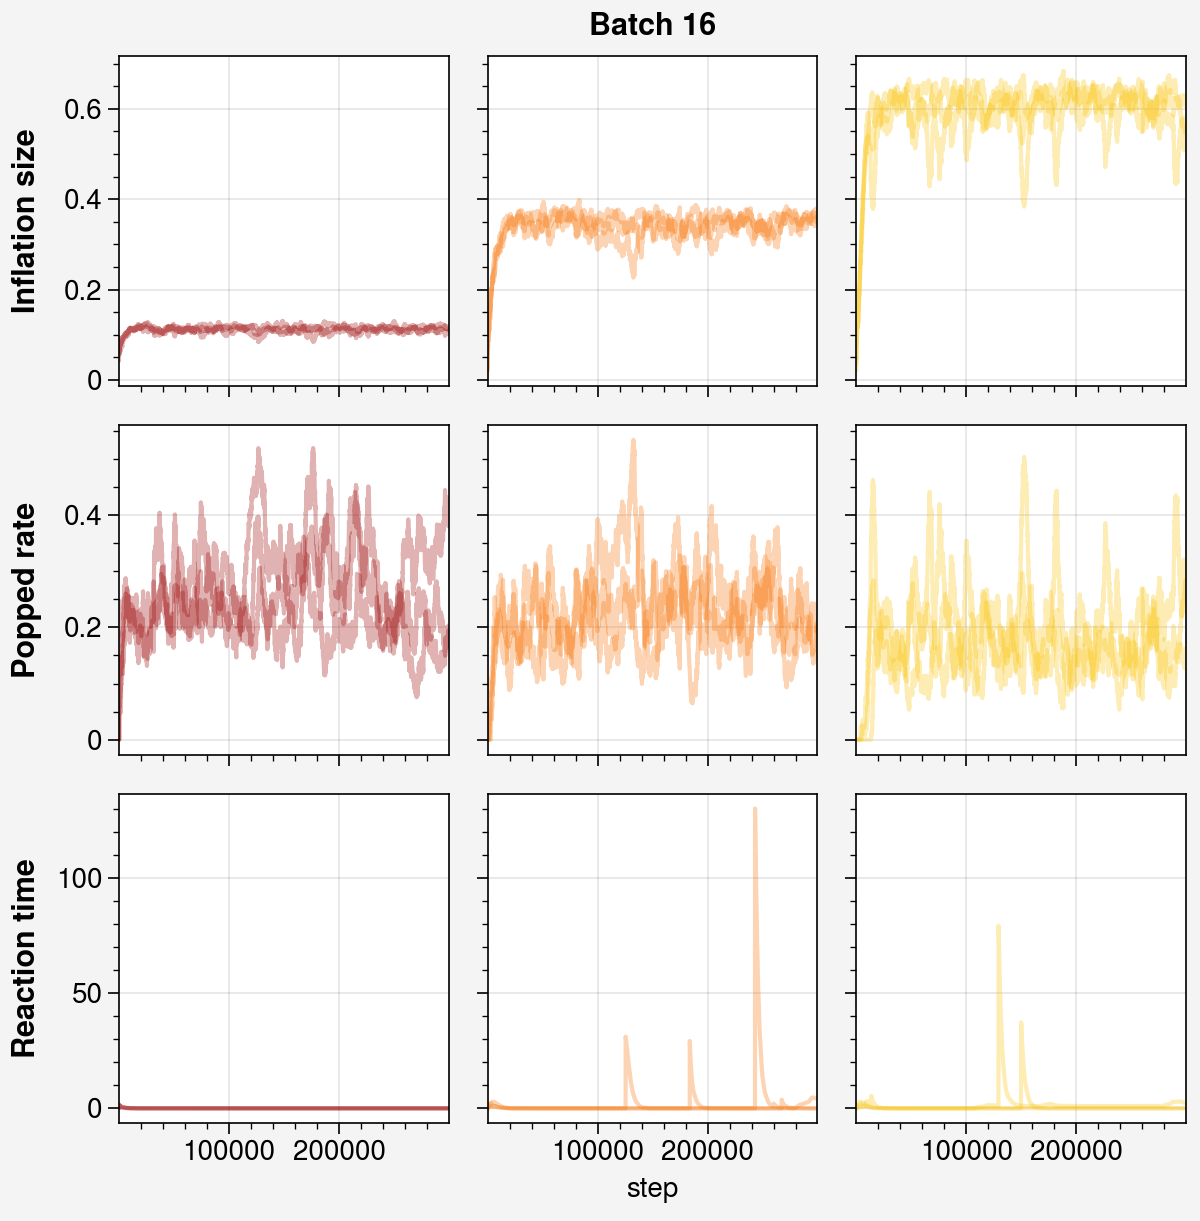

In [9]:
ax = None
for i in range(3):
    df = load_exp_df('behav/behav_batch16', trial_num=i)
    ax = plot_bart_behaviors(df, metrics=['size', 'popped', 'rt'], ax=ax,
                             alpha=0.3)

ax.format(suptitle='Batch 16')

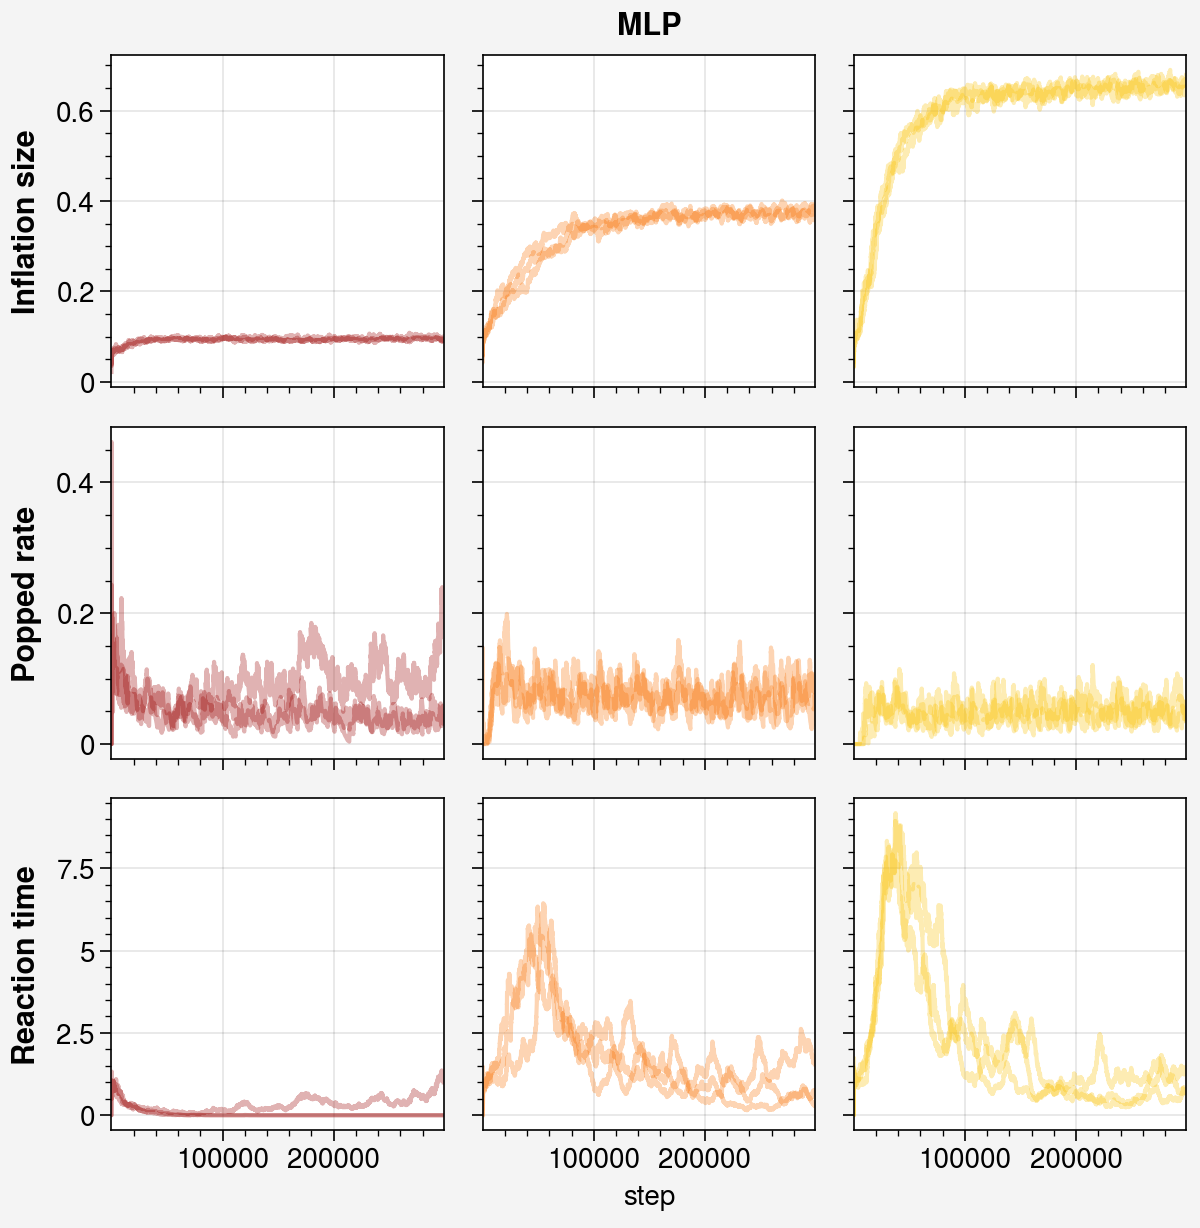

In [10]:
ax = None
for i in range(3):
    df = load_exp_df('behav/behav_mlp', trial_num=i)
    ax = plot_bart_behaviors(df, metrics=['size', 'popped', 'rt'], ax=ax,
                             alpha=0.3)

ax.format(suptitle='MLP')


# MetaBart

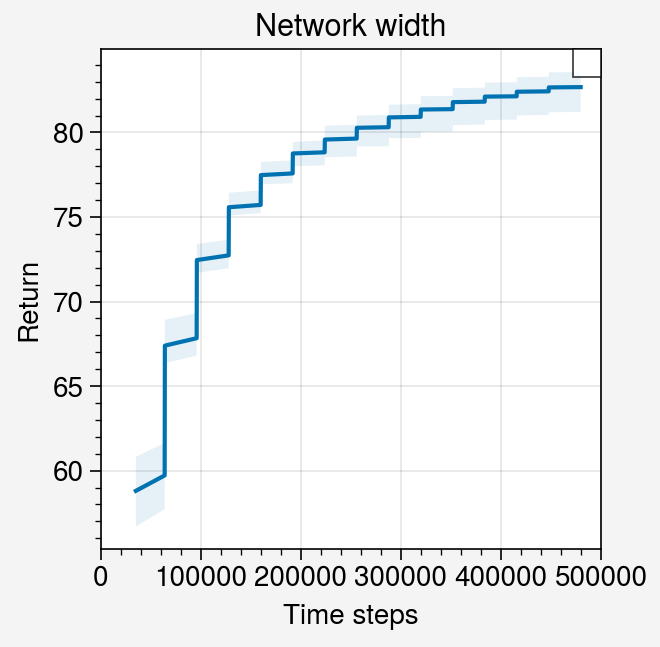

In [3]:
fig, ax = pplt.subplots()
exp_name = f'meta/meta'
average_runs(exp_name, ewm=0.001, ax=ax,)
ax.legend()
ax.format(xlim=[0, 500_000], title='Network width', ylabel='Return',
          xlabel='Time steps')

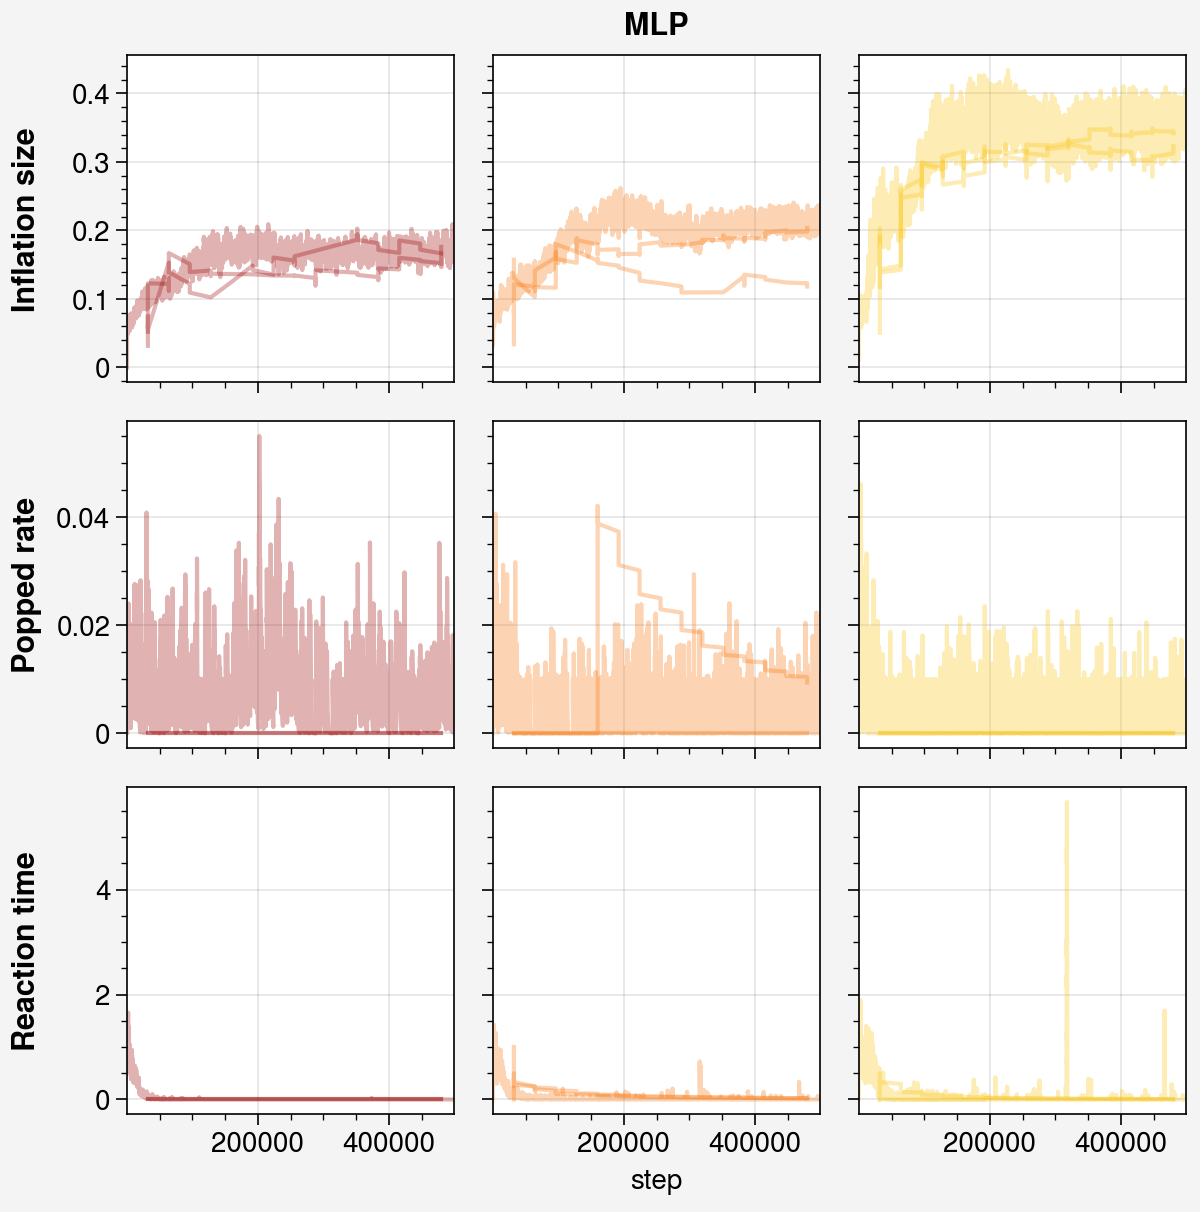

In [4]:
ax = None
for i in range(3):
    df = load_exp_df('meta/meta', trial_num=i)
    ax = plot_bart_behaviors(df, metrics=['size', 'popped', 'rt'], ax=ax,
                             alpha=0.3)

ax.format(suptitle='meta')

In [8]:
df[df['metric'] == 'bart/color']

,Unnamed: 0,metric,value,step
2672,0,bart/color,2.0,32000.0
2673,1,bart/color,0.0,32001.0
2674,2,bart/color,1.0,32002.0
2675,3,bart/color,2.0,32003.0
2676,4,bart/color,2.0,32004.0
...,...,...,...,...
2907,235,bart/color,1.0,480011.0
2908,236,bart/color,1.0,480012.0
2909,237,bart/color,1.0,480013.0
2910,238,bart/color,0.0,480014.0


## 1 Color Trials

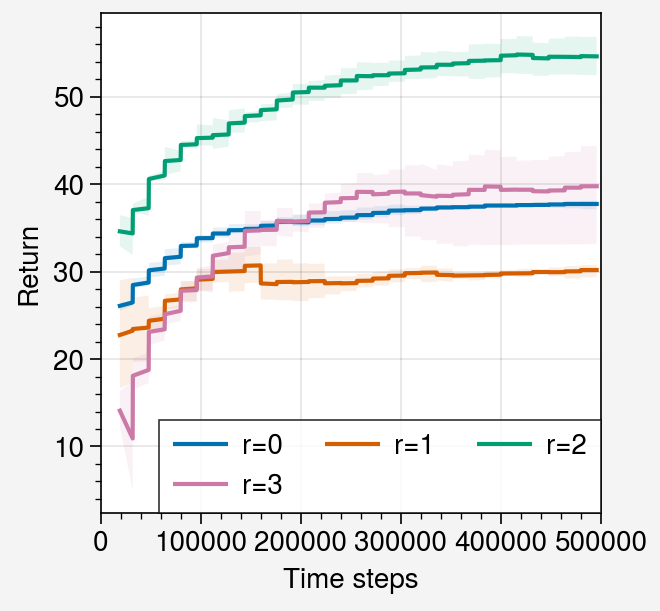

In [4]:
fig, ax = pplt.subplots()
rew_structures = [0, 1, 2, 3]
for r in rew_structures:
    exp_name = f'meta/meta_easyr{r}'
    average_runs(exp_name, ewm=0.001, ax=ax, label=f'r={r}')
    ax.format(xlim=[0, 500_000], ylabel='Return',
            xlabel='Time steps')
ax.legend()

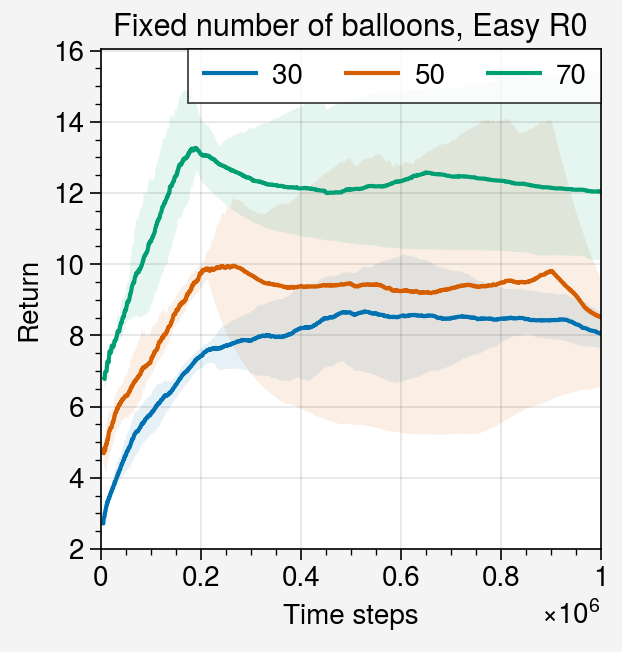

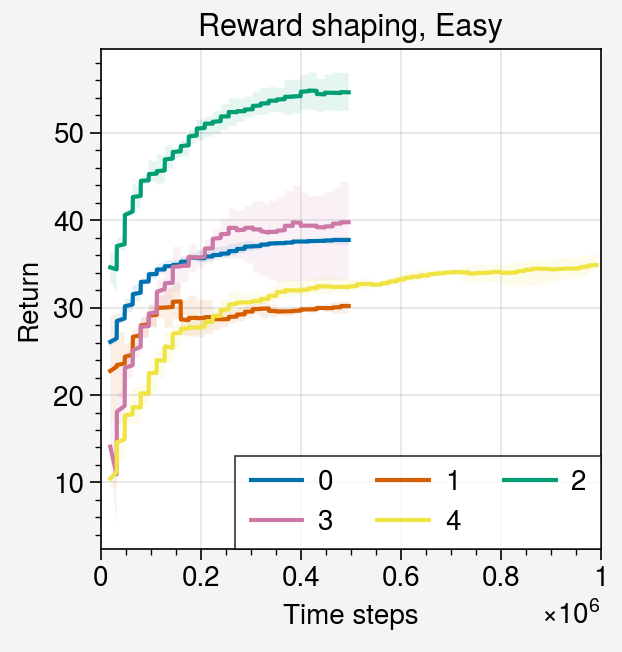

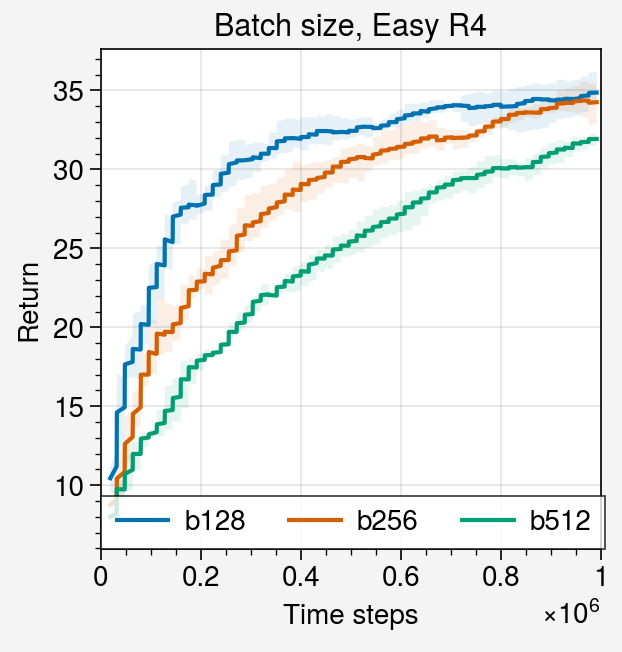

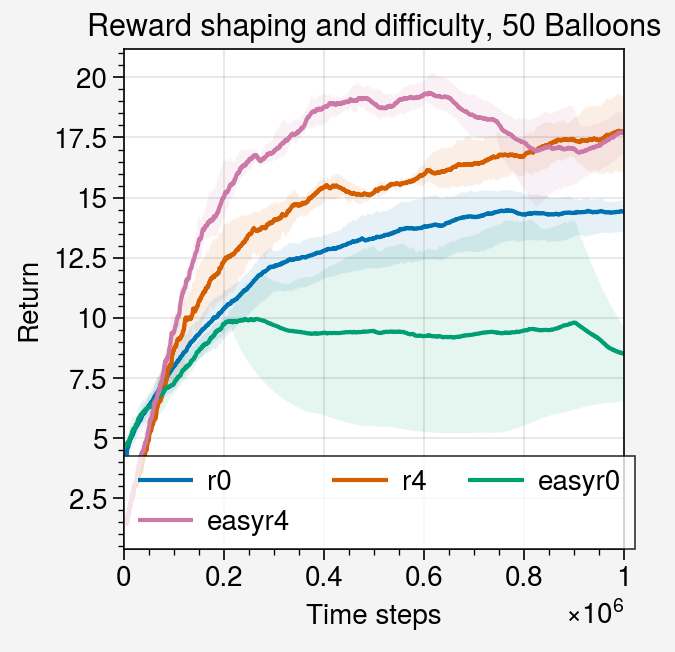

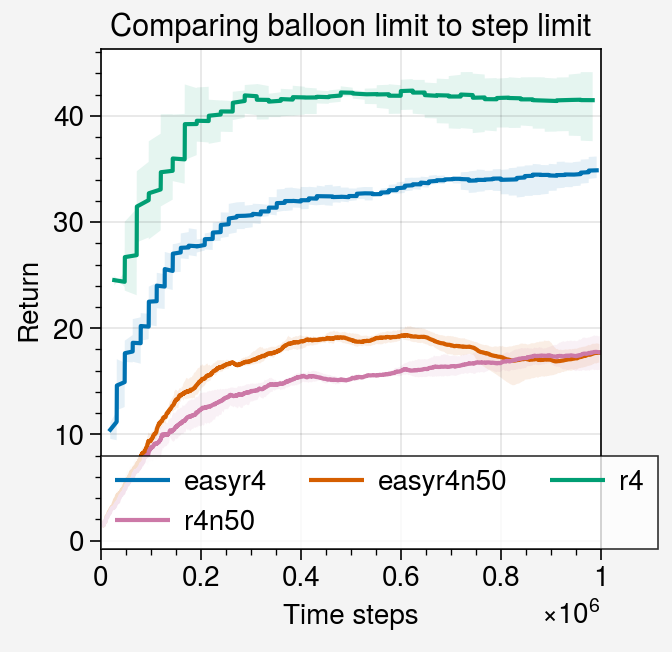

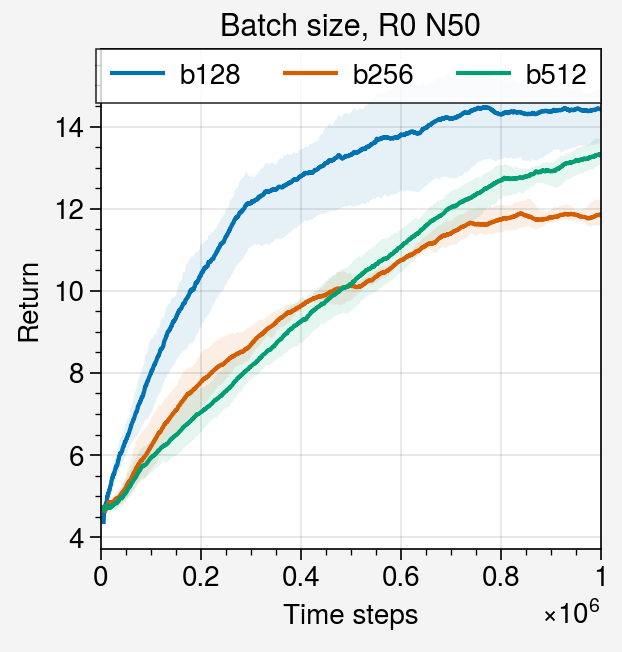

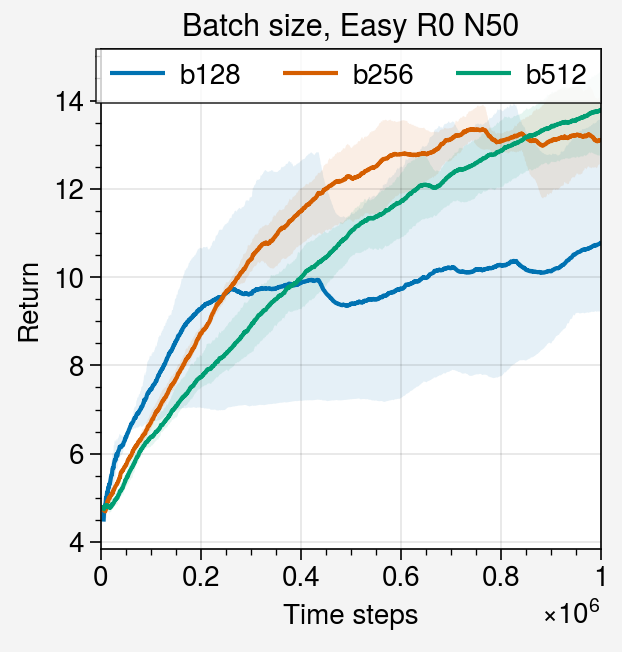

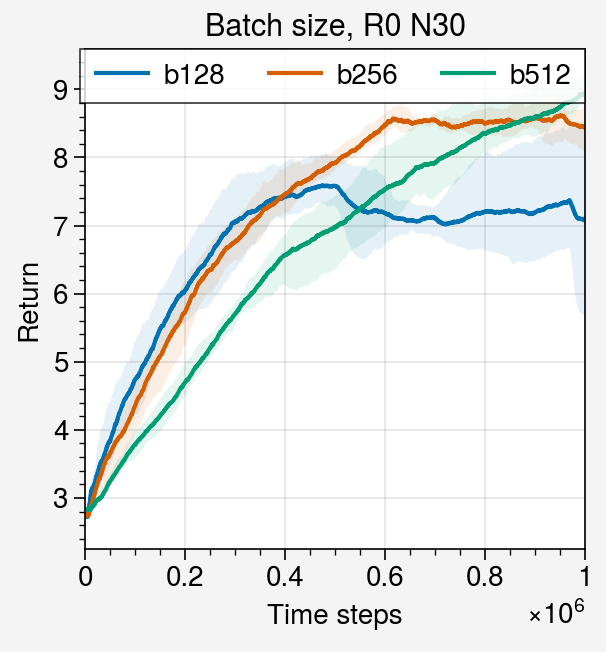

In [6]:
comparisons = {
    'num_balloons': {
        'title': 'Fixed number of balloons, Easy R0',
        'exp_types': ['easyr0n30', 'easyr0n50', 'easyr0n70'],
        'labels': [30, 50, 70]
    },
    'reward_shaping': {
        'title': 'Reward shaping, Easy',
        'exp_types': ['easyr0', 'easyr1', 'easyr2', 'easyr3', 'easyr4'],
        'labels': [0, 1, 2, 3, 4],
    },
    'easyr4batch': {
        'title': 'Batch size, Easy R4',
        'exp_types': ['easyr4', 'easyr4b256', 'easyr4b512'], 
        'labels': ['b128', 'b256', 'b512']
    },
    'num_balloons_rew': {
        'title': 'Reward shaping and difficulty, 50 Balloons',
        'exp_types': ['r0n50', 'r4n50', 'easyr0n50', 'easyr4n50'],
        'labels': ['r0', 'r4', 'easyr0', 'easyr4']
    },
    'num_balloons_comp': {
        'title': 'Comparing balloon limit to step limit',
        'exp_types': ['easyr4', 'easyr4n50', 'r4', 'r4n50'],
        'labels': ['easyr4', 'easyr4n50', 'r4', 'r4n50'],
    },
    'n50_batch': {
        'title': 'Batch size, R0 N50',
        'exp_types': ['r0n50b128', 'r0n50b256', 'r0n50b512',],
        'labels': ['b128', 'b256', 'b512']
    },
    'easyn50_batch': {
        'title': 'Batch size, Easy R0 N50',
        'exp_types': ['easyr0n50b128', 'easyr0n50b256', 'easyr0n50b512',],
        'labels': ['b128', 'b256', 'b512']
    },
    'n30_batch': {
        'title': 'Batch size, R0 N30',
        'exp_types': ['r0n30b128', 'r0n30b256', 'r0n30b512',],
        'labels': ['b128', 'b256', 'b512']
    },
}

for key in comparisons:
    fig, ax = pplt.subplots()
    exp_types = comparisons[key]['exp_types']
    labels = comparisons[key]['labels']
    title = comparisons[key]['title']

    for i, exp_type in enumerate(exp_types):
        exp_name = f'meta/meta_{exp_type}'
        average_runs(exp_name, ewm=0.001, ax=ax, label=labels[i])
    ax.format(title=title, xlim=[0, 1_000_000], ylabel='Return',
            xlabel='Time steps')
    ax.legend()

# 3 Color Advanced

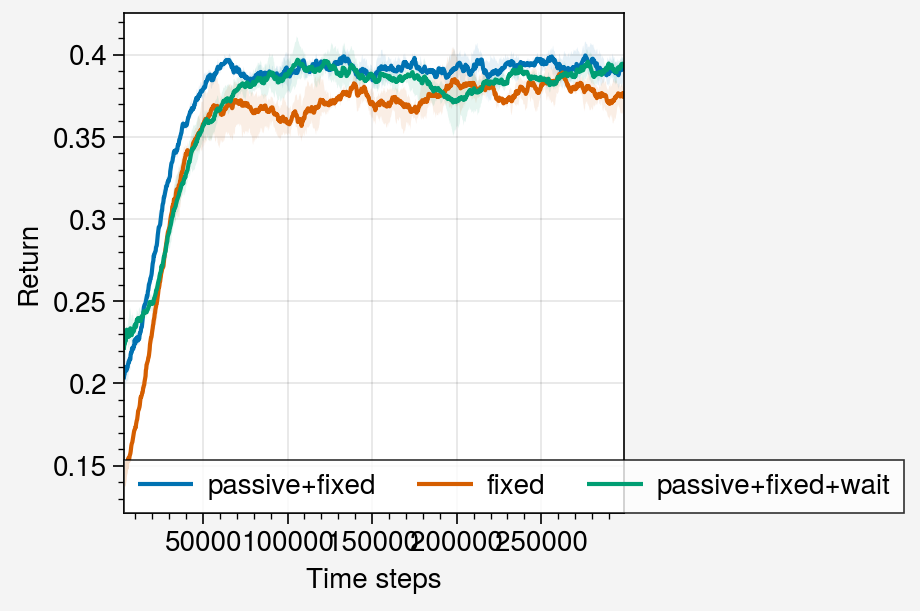

In [4]:
exp_types = ['', '_pp0', '_wait']
labels = ['passive+fixed', 'fixed', 'passive+fixed+wait']

fig, ax = pplt.subplots()

for i, exp_type in enumerate(exp_types):
    exp_name = f'full/full{exp_type}'
    average_runs(exp_name, ewm=0.001, ax=ax, label=labels[i])

ax.format(ylabel='Return',
        xlabel='Time steps')
ax.legend()

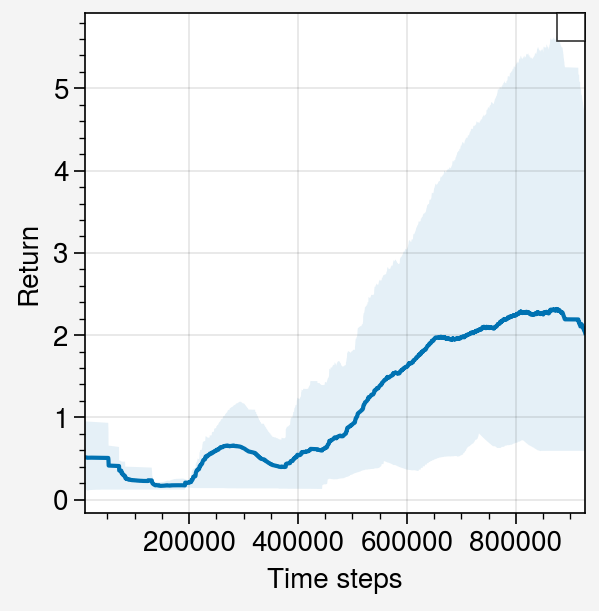

In [3]:

fig, ax = pplt.subplots()

exp_name = 'meta_v2/p2.0n50det'
average_runs(exp_name, ewm=0.001, ax=ax, )

ax.format(ylabel='Return',
        xlabel='Time steps')
ax.legend()

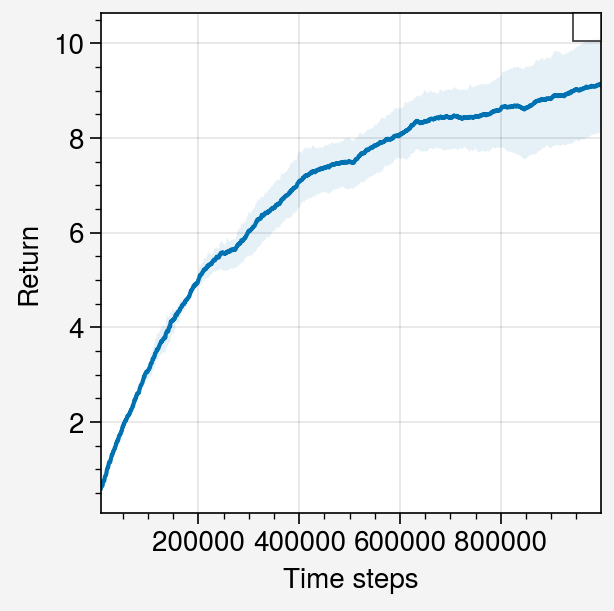

In [4]:

fig, ax = pplt.subplots()

exp_name = 'meta_v2/p2.0n50'
average_runs(exp_name, ewm=0.001, ax=ax, )

ax.format(ylabel='Return',
        xlabel='Time steps')
ax.legend()